In [1]:
import urllib.request
import os
data_url = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"
data_file_path = "data/titanic3.xls"
if not os.path.isfile(data_file_path):
    result = urllib.request.urlretrieve(data_url,data_file_path)
    print('downloaded:', result)
else:
    print(data_file_path, 'data file already exists.')

In [2]:
import numpy
import pandas as pd
df_data = pd.read_excel(data_file_path)

In [3]:
df_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
df_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
selected_cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp','parch', 'fare', 'embarked']
selected_df_data = df_data[selected_cols]

In [6]:
selected_df_data

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",3,female,14.5000,1,0,14.4542,C
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,7.2250,C


In [7]:
from sklearn import preprocessing
def prepare_data(df_data):
    df = df_data.drop(['name'], axis=1)#删除姓名列
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)#为缺失age记录填充值
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)#为缺失fare记录填充
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    df['embarked'] = df['embarked'].fillna('S')#为缺失embarked记录填充
    df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)
    ndarray_data = df.values#转换为ndarray数组
    features = ndarray_data[:,1:]#特征值
    label = ndarray_data[:,0]#标签值
    #数据标准化
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    norm_features = minmax_scale.fit_transform(features)
    
    return norm_features, label

In [8]:
shuffled_df_data = selected_df_data.sample(frac=1)
#打乱数据顺序

In [9]:
x_data, y_data = prepare_data(shuffled_df_data)

In [10]:
train_size = int(len(x_data)*0.8)
x_train = x_data[:train_size]
y_train = y_data[:train_size]
x_test = x_data[train_size:]
y_test = y_data[train_size:]

In [11]:
import tensorflow as tf
model = tf.keras.models.Sequential()#建立Keras模型序列

In [12]:
#第一层
model.add(tf.keras.layers.Dense(units=64,
                               input_dim=7,
                               use_bias=True,
                               kernel_initializer='uniform',
                               bias_initializer='zeros',
                               activation='relu'))

In [13]:
#第二层
model.add(tf.keras.layers.Dense(units=32,
                                activation='sigmoid'))

In [14]:
#输出层
model.add(tf.keras.layers.Dense(units=1,
                                activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [17]:
train_history = model.fit(x=x_train,
                          y=y_train,
                          validation_split=0.2,
                          epochs=100,
                          batch_size=40,
                          verbose=2)

Train on 837 samples, validate on 210 samples
Epoch 1/100
837/837 - 1s - loss: 0.6492 - accuracy: 0.6069 - val_loss: 0.5881 - val_accuracy: 0.6667
Epoch 2/100
837/837 - 0s - loss: 0.5831 - accuracy: 0.7013 - val_loss: 0.5224 - val_accuracy: 0.7667
Epoch 3/100
837/837 - 0s - loss: 0.5132 - accuracy: 0.7802 - val_loss: 0.4849 - val_accuracy: 0.7619
Epoch 4/100
837/837 - 0s - loss: 0.4836 - accuracy: 0.7814 - val_loss: 0.4749 - val_accuracy: 0.7619
Epoch 5/100
837/837 - 0s - loss: 0.4721 - accuracy: 0.7921 - val_loss: 0.4662 - val_accuracy: 0.7667
Epoch 6/100
837/837 - 0s - loss: 0.4654 - accuracy: 0.7873 - val_loss: 0.4816 - val_accuracy: 0.7571
Epoch 7/100
837/837 - 0s - loss: 0.4633 - accuracy: 0.8029 - val_loss: 0.4617 - val_accuracy: 0.7667
Epoch 8/100
837/837 - 0s - loss: 0.4587 - accuracy: 0.8005 - val_loss: 0.4603 - val_accuracy: 0.7667
Epoch 9/100
837/837 - 0s - loss: 0.4554 - accuracy: 0.7957 - val_loss: 0.4631 - val_accuracy: 0.7524
Epoch 10/100
837/837 - 0s - loss: 0.4505 - ac

Epoch 81/100
837/837 - 0s - loss: 0.4215 - accuracy: 0.8208 - val_loss: 0.4460 - val_accuracy: 0.7762
Epoch 82/100
837/837 - 0s - loss: 0.4230 - accuracy: 0.8232 - val_loss: 0.4452 - val_accuracy: 0.7905
Epoch 83/100
837/837 - 0s - loss: 0.4312 - accuracy: 0.8124 - val_loss: 0.4614 - val_accuracy: 0.7810
Epoch 84/100
837/837 - 0s - loss: 0.4245 - accuracy: 0.8136 - val_loss: 0.4448 - val_accuracy: 0.7952
Epoch 85/100
837/837 - 0s - loss: 0.4217 - accuracy: 0.8196 - val_loss: 0.4452 - val_accuracy: 0.7952
Epoch 86/100
837/837 - 0s - loss: 0.4224 - accuracy: 0.8256 - val_loss: 0.4428 - val_accuracy: 0.8000
Epoch 87/100
837/837 - 0s - loss: 0.4244 - accuracy: 0.8208 - val_loss: 0.4482 - val_accuracy: 0.7905
Epoch 88/100
837/837 - 0s - loss: 0.4207 - accuracy: 0.8172 - val_loss: 0.4488 - val_accuracy: 0.7857
Epoch 89/100
837/837 - 0s - loss: 0.4204 - accuracy: 0.8172 - val_loss: 0.4446 - val_accuracy: 0.7857
Epoch 90/100
837/837 - 0s - loss: 0.4224 - accuracy: 0.8196 - val_loss: 0.4452 - v

In [18]:
train_history.history

{'loss': [0.6492321850863266,
  0.5831128666477818,
  0.5132344659226484,
  0.4836088093164574,
  0.4721361709182265,
  0.46538862639430606,
  0.46326023667801525,
  0.45869790560598156,
  0.4553686161408715,
  0.45051035430981123,
  0.44832382478451926,
  0.44704988609505386,
  0.4453134576622018,
  0.44461426904409446,
  0.4446088204888033,
  0.4425008336845407,
  0.442755135441624,
  0.44082205341138575,
  0.4401129616631402,
  0.4421264961486506,
  0.44045445981703635,
  0.4392745889002277,
  0.43650383725673353,
  0.43678571356809837,
  0.43716937289300645,
  0.4341826293274778,
  0.4371690035507243,
  0.43656193825506395,
  0.4352675845830956,
  0.4358437050806009,
  0.4328204408341411,
  0.4376551726100835,
  0.4328904770038746,
  0.4323979239096351,
  0.43459988181593884,
  0.4334822145770243,
  0.4314788115636992,
  0.43223236079284366,
  0.43041688388963467,
  0.433215463781015,
  0.4376636934394335,
  0.4395349220135733,
  0.4301726961221319,
  0.4302987417154984,
  0.430956

In [21]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
#训练过程可视化
import matplotlib.pyplot as plt
def visu_train_history(train_history, train_metric, validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

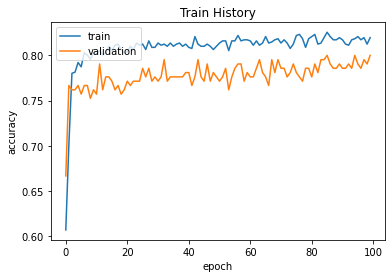

In [23]:
visu_train_history(train_history, 'accuracy', 'val_accuracy')

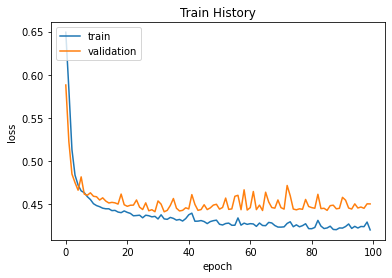

In [24]:
visu_train_history(train_history, 'loss', 'val_loss')

In [25]:
evaluate_result = model.evaluate(x=x_test,
                                 y=y_test)

262/262 [==============================] - 0s 99us/sample - loss: 0.4688 - accuracy: 0.8053


In [26]:
evaluate_result

[0.46878717987591983, 0.8053435]

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
selected_cols

['survived',
 'name',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked']

In [29]:
#模型应用
Jack_info = [0, 'Jack', 3, 'male', 23, 1, 0, 5.000, 'S']
Rose_info = [1, 'Rose', 1, 'female', 20, 1, 0, 100.000, 'S']

In [33]:
new_passenger_pd = pd.DataFrame([Jack_info, Rose_info], columns=selected_cols)

In [35]:
all_passenger_pd = selected_df_data.append(new_passenger_pd)

In [36]:
all_passenger_pd[-3:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S
0,0,Jack,3,male,23.0,1,0,5.000,S
1,1,Rose,1,female,20.0,1,0,100.000,S


In [37]:
x_features, y_label = prepare_data(all_passenger_pd)

In [38]:
surv_probability = model.predict(x_features)

In [39]:
surv_probability[:5]

array([[0.9844189 ],
       [0.55723697],
       [0.95527947],
       [0.19588833],
       [0.9680315 ]], dtype=float32)

In [40]:
all_passenger_pd.insert(len(all_passenger_pd.columns), 'surv_probability', surv_probability)

In [42]:
all_passenger_pd[-5:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,surv_probability
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.225,C,0.226063
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.225,C,0.220251
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S,0.141641
0,0,Jack,3,male,23.0,1,0,5.000,S,0.141057
1,1,Rose,1,female,20.0,1,0,100.000,S,0.980550


In [43]:
all_passenger_pd[(all_passenger_pd['survived']==0) & (all_passenger_pd['surv_probability'])]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,surv_probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.955279
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0,1,2,151.5500,S,0.195888
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.968032
7,0,"Andrews, Mr. Thomas Jr",1,male,39.0,0,0,0.0000,S,0.386248
9,0,"Artagaveytia, Mr. Ramon",1,male,71.0,0,0,49.5042,C,0.292550
...,...,...,...,...,...,...,...,...,...,...
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C,0.636432
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.2250,C,0.226063
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.2250,C,0.220251
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.8750,S,0.141641
